In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tables

In [2]:
with tables.open_file('InterviewTaskData.h5') as infile:
    timestamps = infile.root.time[:]
    counts = infile.root.counts[:]

Problem 1

In [6]:
# Filter all the timestamps for gray ions. 
# Assign the gray ions timestamps as 1 and non-gray ions timestamps as 0
for idx1,list in enumerate(timestamps):
    for idx2,item in enumerate(list):
        if 6315<=item<=6876:
            timestamps[idx1][idx2]=1
        else:
            timestamps[idx1][idx2]=0 

In [7]:
# Calculate the nubmer of gray ion counts in each timestamps of the gray ion channel
gray_ions_channel=[]
for arr1,arr2 in zip(timestamps,counts):
    gray_ions_amt=arr1*arr2
    gray_ions_channel.append(gray_ions_amt)

In [8]:
# Calculate the number of gray ion counts in each pixel
gray_ions_int = []
for idx,arr in enumerate (gray_ions_channel):
    int_per_px=sum(gray_ions_channel[idx])
    gray_ions_int.append(int_per_px)

In [9]:
gray_ions_img=np.reshape(gray_ions_int,(512,512))

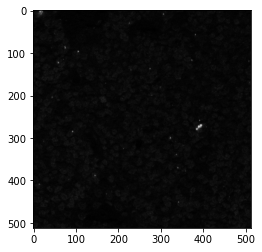

In [11]:
plt.imshow (gray_ions_img,'gray')

Problem 2

In [12]:
# Create image of red ions 

In [13]:
with tables.open_file('InterviewTaskData.h5') as infile:
    timestamps = infile.root.time[:]
    counts = infile.root.counts[:]

In [14]:
for idx1,arr in enumerate(timestamps):
    for idx2,item in enumerate(arr):
        if 16029<=item<=16078:
            timestamps[idx1][idx2]=1
        else:
            timestamps[idx1][idx2]=0 

In [15]:
red_ions_channel=[]
for arr1,arr2 in zip(timestamps,counts):
    red_ions_amt=arr1*arr2
    red_ions_channel.append(red_ions_amt)

In [16]:
red_ions_int = []
for idx,arr in enumerate (red_ions_channel):
    red_px_int=sum(red_ions_channel[idx])
    red_ions_int.append(red_px_int)

In [17]:
red_ions_img=np.reshape(red_ions_int,(512,512))

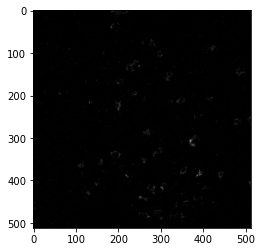

In [18]:
plt.imshow(red_ions_img,'gray')

In [19]:
# Create image of green ions 

In [20]:
with tables.open_file('InterviewTaskData.h5') as infile:
    timestamps = infile.root.time[:]
    counts = infile.root.counts[:]

In [21]:
for idx1,arr in enumerate(timestamps):
    for idx2,item in enumerate(arr):
        if 12118<=item<=12184:
            timestamps[idx1][idx2]=1
        else:
            timestamps[idx1][idx2]=0 

In [22]:
gr_ions_channel=[]
for arr1,arr2 in zip(timestamps,counts):
    gr_ions_amt=arr1*arr2
    gr_ions_channel.append(gr_ions_amt)

In [23]:
gr_ions_int = []
for idx,arr in enumerate (gr_ions_channel):
    gr_px_int=sum(gr_ions_channel[idx])
    gr_ions_int.append(gr_px_int)

In [24]:
gr_ions_img=np.reshape(gr_ions_int,(512,512))

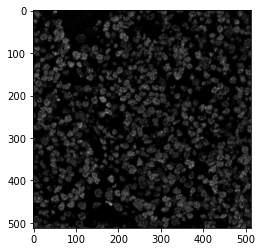

In [25]:
plt.imshow(gr_ions_img,'gray')

In [26]:
# Create image of blue ions 

In [27]:
with tables.open_file('InterviewTaskData.h5') as infile:
    timestamps = infile.root.time[:]
    counts = infile.root.counts[:]

In [28]:
for idx1,arr in enumerate(timestamps):
    for idx2,item in enumerate(arr):
        if 15829<=item<=15879:
            timestamps[idx1][idx2]=1
        else:
            timestamps[idx1][idx2]=0 

In [29]:
bl_ions_channel=[]
for arr1,arr2 in zip(timestamps,counts):
    bl_ions_amt=arr1*arr2
    bl_ions_channel.append(bl_ions_amt)

In [30]:
bl_ions_int = []
for idx,arr in enumerate (bl_ions_channel):
    bl_px_int=sum(bl_ions_channel[idx])
    bl_ions_int.append(bl_px_int)

In [31]:
bl_ions_img=np.reshape(bl_ions_int,(512,512))

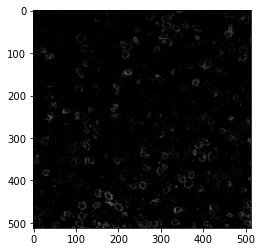

In [32]:
plt.imshow(bl_ions_img,'gray')

In [33]:
# Creat RGB images of the red, green and blue ions

In [34]:
rgb=np.zeros((512,512,3))

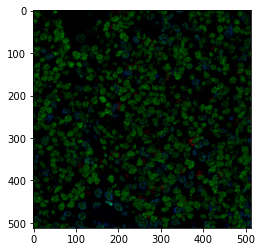

In [35]:
rgb[:,:,0]=red_ions_img/red_ions_img.max()
rgb[:,:,1]=gr_ions_img/gr_ions_img.max()
rgb[:,:,2]=bl_ions_img/bl_ions_img.max()
plt.imshow(rgb)

Problem 3

In [41]:
r=rgb[:,:,0]
g=rgb[:,:,1]
b=rgb[:,:,2]

In [48]:
# Create binary image of red ions
thr,red_ions_mask = cv.threshold(r,np.min(r[np.nonzero(r)]),255,cv.THRESH_BINARY)

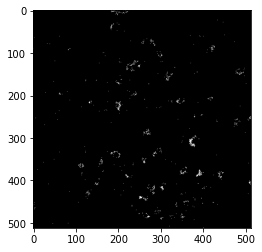

In [49]:
plt.imshow(red_ions_mask,'gray')

In [51]:
# Create binary image of green ions
thr,gr_ions_mask = cv.threshold(g,np.min(g[np.nonzero(g)]),255,cv.THRESH_BINARY)

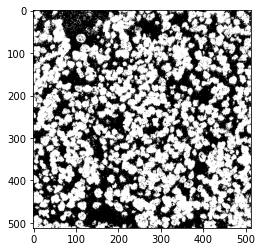

In [52]:
plt.imshow(gr_ions_mask,'gray')

In [53]:
# Create binary image of blue ions
thr,bl_ions_mask = cv.threshold(b,np.min(b[np.nonzero(b)]),255,cv.THRESH_BINARY)

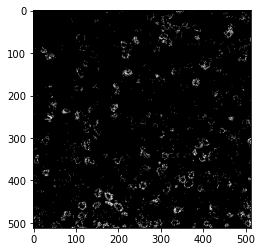

In [54]:
plt.imshow(bl_ions_mask,'gray')

In [75]:
from skimage.measure import label
from skimage.measure import regionprops
import math

In [58]:
# Label the binary images of red, green and blue ions
r_label=label(red_ions_mask)
g_label=label(gr_ions_mask)
b_label=label(bl_ions_mask)

In [64]:
r_props = regionprops(r_label, red_ions_mask)
g_props = regionprops(g_label, gr_ions_mask)
b_props = regionprops(b_label, bl_ions_mask)

In [76]:
# Calculate the distance between each labeled blue ions and each labeled red ions
dist_br = []
for i in range (0,b_label.max()):
    for j in range (0,r_label.max()):
        dx2 = (b_props[i].centroid[0]-r_props[j].centroid[0])**2         
        dy2 = (b_props[i].centroid[1]-r_props[j].centroid[1])**2         
        distance = math.sqrt(dx2 + dy2)
        dist_br.append(distance)

In [79]:
# Calculate the distance between each labeled blue ions and each labeled green ions
dist_bg = []
for i in range (0,b_label.max()):
    for j in range (0,g_label.max()):
        dx2 = (b_props[i].centroid[0]-g_props[j].centroid[0])**2         
        dy2 = (b_props[i].centroid[1]-g_props[j].centroid[1])**2         
        distance = math.sqrt(dx2 + dy2)
        dist_bg.append(distance)

In [90]:
avg_br_dist=np.average(dist_br)
avg_bg_dist=np.average(dist_bg)
if avg_br_dist < avg_bg_dist:
    print("Blue ions are more likely occur near red ions")
else:
    print("Blue ions are more likely occur near green ions")

Blue ions are more likely occur near red ions


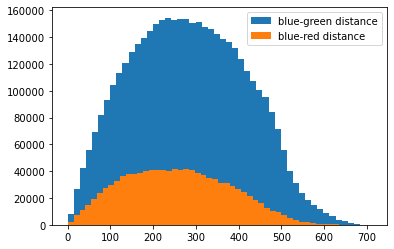

In [88]:
# Plot the histograms of blue-red ions distance and blue-green ions distance
plt.hist(dist_bg,bins=50, label='blue-green distance')
plt.hist(dist_br,bins=50,label='blue-red distance')
plt.legend(loc='upper right')
plt.show()